Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/5
1936/1936 [==============================] - 59s 30ms/step - loss: 0.2078 - accuracy: 0.9364
Epoch 2/5
1936/1936 [==============================] - 54s 28ms/step - loss: 0.0827 - accuracy: 0.9746
Epoch 3/5
1936/1936 [==============================] - 79s 41ms/step - loss: 0.0684 - accuracy: 0.9798
Epoch 4/5
1936/1936 [==============================] - 74s 38ms/step - loss: 0.0599 - accuracy: 0.9823
Epoch 5/5
1936/1936 [==============================] - 62s 32ms/step - loss: 0.0542 - accuracy: 0.9836
Accuracy score:  0.9891999959945679
313/313 [==============================] - 3s 9ms/step
[[ 977    0    0    0    0    0    1    1    1    0]
 [   0 1129    1    2    0    2    1    0    0    0]
 [   1    0 1022    0    1    0    0    6    2    0]
 [   0    0    2 1003    0    2    0    2    1    0]
 [   0    0    0    0  969    0    3

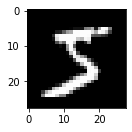

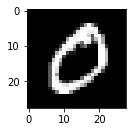

In [8]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# train i test podaci
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# prikaz karakteristika train i test podataka
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# TODO: prikazi nekoliko slika iz train skupa
for i in range(4):
  plt.figure()
  plt.subplot(2, 2, i+1)
  plt.imshow(x_train[i], cmap='gray')

# skaliranje slike na raspon [0,1]
x_train_s = x_train.astype("float32") / 255
x_test_s = x_test.astype("float32") / 255

# slike trebaju biti (28, 28, 1)
x_train_s = np.expand_dims(x_train_s, -1)
x_test_s = np.expand_dims(x_test_s, -1)

print("x_train shape:", x_train_s.shape)
print(x_train_s.shape[0], "train samples")
print(x_test_s.shape[0], "test samples")

# pretvori labele
y_train_s = keras.utils.to_categorical(y_train, num_classes)
y_test_s = keras.utils.to_categorical(y_test, num_classes)


# TODO: kreiraj model pomocu keras.Sequential(); prikazi njegovu strukturu
model = Sequential([
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
])


# TODO: definiraj karakteristike procesa ucenja pomocu .compile()
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


# TODO: provedi ucenje mreze
model.fit(x_train_s, y_train_s, epochs=5, batch_size=31)


# TODO: Prikazi test accuracy i matricu zabune
score = model.evaluate(x_test_s, y_test_s, verbose=0)
print("Accuracy score: ", score[1])

y_pred = model.predict(x_test_s)

Y_pred = np.argmax(y_pred, 1)
Y_test = np.argmax(y_test_s, 1)

confusionMatrix = confusion_matrix(Y_test, Y_pred)
print(confusionMatrix)


# TODO: spremi model
model.save('data')



<ipython-input-19-1d163ae87dc2>:11: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  img = color.rgb2gray(img)


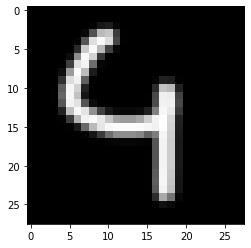

1/1 [==============================] - 0s 68ms/step
------------------------
Predviđeno:  4


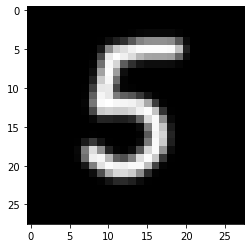

1/1 [==============================] - 0s 22ms/step
------------------------
Predviđeno:  5


In [19]:
from keras.models import load_model
from matplotlib import pyplot as plt
from skimage.transform import resize
from skimage import color
import matplotlib.image as mpimg
import numpy as np

filename = 'test.png'

img = mpimg.imread(filename)
img = color.rgb2gray(img)
img = resize(img, (28, 28))


plt.figure()
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.show()


img = img.reshape(1, 28, 28, 1)
img = img.astype('float32')


# TODO: ucitaj model
model = load_model('data')
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['Accuracy'])

# TODO: napravi predikciju 
x_pred = model.predict(img)
x_classes = np.argmax(x_pred, axis=1)

# TODO: ispis rezultat
print("------------------------")
print("Predviđeno: ", x_classes[0])

#-------------------------------------

img2 = mpimg.imread('broj5.png')
img2 = color.rgb2gray(img2)
img2 = resize(img2, (28, 28))

plt.figure()
plt.imshow(img2, cmap='gray')
plt.show()

img2 = img2.reshape(1, 28, 28, 1)
img2 = img2.astype('float32')

x_pred_2 = model.predict(img2)
x_classes_2 = np.argmax(x_pred_2, axis=1)

print("------------------------")
print("Predviđeno: ", x_classes_2[0])




In [ ]:
import cv2
import numpy as np
from keras.models import load_model
from sklearn.neural_network import MLPClassifier



# display
cv2.namedWindow("frame", cv2.WINDOW_NORMAL)   
cv2.namedWindow("edges", cv2.WINDOW_NORMAL)
font = cv2.FONT_HERSHEY_SIMPLEX

# TODO: ucitaj mrezu s diska
model = load_model('data')
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# algorithm params
pad = 15
size_th = 32
mnist_size = 28

# video processing
cp = cv2.VideoCapture(0)
kernel1 = np.ones((7,7), np.uint8)
kernel2 = np.ones((5,5), np.uint8)

# some vars
label = "unkown"

while True:
    
    ret, frame = cp.read(0)

    # frame preprocessing - getting edges
    gray_img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray_img = cv2.GaussianBlur(gray_img, (5, 5), 0)
    v = np.median(gray_img)
    lower = int(max(0, (1.0 - 0.33) * v))
    upper = int(min(255, (1.0 + 0.33) * v))
    edge_img = cv2.Canny(gray_img, lower, upper)
    img_preprocessed = cv2.dilate(edge_img, kernel1, iterations=1)
    img_preprocessed = cv2.erode(img_preprocessed, kernel2, iterations=1)

    # get countours and bounding boxes (rects)
    _, contours, _ = cv2.findContours(img_preprocessed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


    rects = [cv2.boundingRect(contour) for contour in contours]
    rects = [rect for rect in rects if rect[2] >= 3 and rect[3] >= 8]


    # loop over all rectangles (detections) and classify them
    for rect in rects:
        
        x, y, w, h = rect

        #crop rectangle from image        
        cropped_digit = img_preprocessed[y-pad:y+h+pad, x-pad:x+w+pad]
        cropped_digit = cropped_digit/255.0

        #filter small rectangles:
        if cropped_digit.shape[0] >= size_th and cropped_digit.shape[1] >= size_th:
            cropped_digit = cv2.resize(cropped_digit, (mnist_size, mnist_size))
        else:
            continue
        
        # start TODO: klasificiraj sliku (cropped_digit) s konvolucijskom neuronskom mrezom i zapisi predikciju u varijablu label (as string)
        predict = model.predict(cropped_digit)
        classes = np.argmax(predict, axis=1)
        label = str(classes[0])

        # end of TODO

        # show rectangle and label on frame
        cv2.rectangle(frame, (x - pad, y - pad), (x + pad + w, y + pad + h), color = (255, 255, 0))

        cv2.putText(frame, label, (rect[0], rect[1]), font,
            fontScale = 0.5,
            color = (255, 0, 0),
            thickness =  1,
            lineType =  cv2.LINE_AA)


    # show results
    cv2.imshow("frame", frame)
    cv2.imshow("edges", img_preprocessed)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
#collab crasha pokretanjem koda